In [24]:
import pandas as pd
import numpy as np


In [25]:
df=pd.read_csv("C:\\Users\\Shyam Bihari Kumar\\Downloads\\archive\\car_data.csv")
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [27]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df["fuel_type"].unique()

array(['gas', 'diesel'], dtype=object)

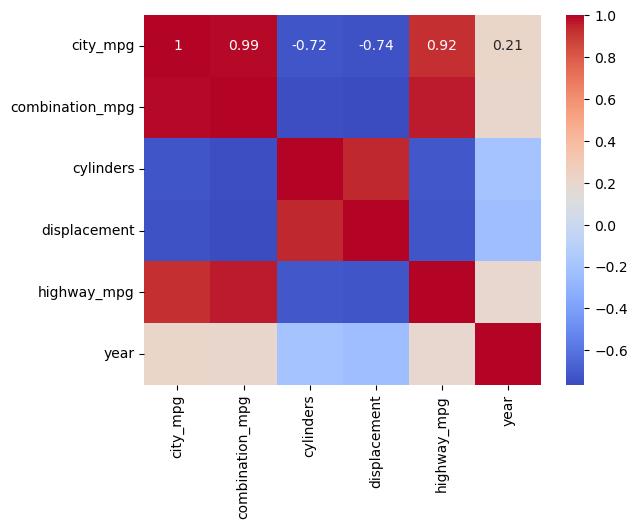

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [33]:
df['class'] = label_encoder.fit_transform(df['class'])

df['drive'] = label_encoder.fit_transform(df['drive'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])


In [34]:
x=df.drop("city_mpg",axis=1)
y=df["city_mpg"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [38]:
print("Train Accuracy :", reg.score(X_train, y_train))
print("Test Accuracy :", reg.score(X_test, y_test))

Train Accuracy : 0.9933234433751134
Test Accuracy : 0.8668153628758517
